pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
44100


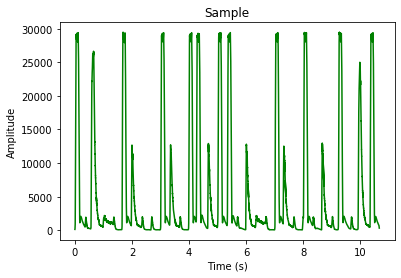

error: video system not initialized

In [1]:
import pygame
import numpy as np
import time
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy.signal import hilbert

input_data = read("/home/nestor/Imágenes/Imagenes_LD/New_Prueba_Loop.wav")
fs = input_data[0]
audio = input_data[1]
amp = audio[:, 0]
t = np.arange(amp.size) / fs
envelope = np.abs(hilbert(amp))

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

print(fs)
#plt.plot(t, amp)
#plt.plot(t, envelope)
plt.plot(t, smooth(envelope, 1000), 'g')
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
# set the title
plt.title("Sample")
# display the plot
plt.show()

pygame.init()

SCR_H = 700
image = pygame.image.load('/home/nestor/Imágenes/Imagenes_LD/Nasa_Eagle_N.jpg')
imSize = imWidth, imHeight = image.get_size()[0] , image.get_size()[1]
size = width, height = int(SCR_H * (imWidth / imHeight)), int(SCR_H)
r_image = pygame.Surface((width, height))
r_image = pygame.transform.smoothscale(image, (width, height))
lil_image = pygame.image.load('/home/nestor/Imágenes/Imagenes_LD/square.png')

lil_size = lil_width, lil_height = 300, 300
lil_r_image = pygame.Surface(lil_size)
lil_r_image = pygame.transform.smoothscale(lil_image, lil_size)

bgColor = 25, 25, 25
WHITE = 255, 255, 255

screen = pygame.display.set_mode(size, pygame.RESIZABLE)
screen.fill(WHITE)
screen.blit(r_image, (0, 0))
screen.blit(lil_r_image, (int((width - lil_width) / 2), int((height - lil_height) / 2)))

pause = True

while 1:
    
    event = pygame.event.get()
    for e in event:
        if e.type == pygame.KEYDOWN:
            pause = not pause
#         mouseClick = pygame.mouse.get_pressed()
#         if sum(mouseClick) > 0:
#             posMx, posMy = pygame.mouse.get_pos()
#             cellMx, cellMy = int(np.floor(posMx / dimCellW)), int(np.floor(posMy / dimCellH))
#             tmp_gState[cellMx, cellMy] = not mouseClick[2]
        if e.type == pygame.QUIT : 
            pygame.quit() 
            quit() 
        
    time.sleep(0.03)
    # pygame.display.flip()
    pygame.display.update()